## Identificación de Asteroides Potencialmente Peligrosos

**Intregrantes**: <br>    
2172016 - Kevin Javier Lozano Galvis<br>
2170688 - Brayan Rodolfo Barajas Ochoa<br>

## **Objetivo** 

Identificar asteroides potencialmente peligrosos usando un enfoque de inteligencia artificial.

## **Introducción**

Las observaciones del explorador de estudio de infrarrojos de campo amplio (WISE), un telescopio espacial astronómico de la NASA lanzado en diciembre de 2009 ha llevado a la excelente valoración de la población de asteroides potencialmente peligrosos en nuestro sistema solar. Los asteroides potencialmente peligrosos, también conocidos como PHA, tienen órbitas que se encuentan a menos de cinco millones de millas (unos ocho millones de kilómetros) de la Tierra, y son lo suficientemente grandes para subsistir al pasar a través de la atmósfera de la Tierra ocasionando daños a escala regional o mayor. Por ende, es crítico evaluar sistemáticamente la magnitud de esta amenaza constante.


## **Motivación**

La identificación de un asteroide peligroso con suficiente antelación, generaría la posibilidad de mitigar el impacto mediante una misión espacial apropiada para alterar la órbita del asteroide. Generalmente, una misión de esta magnitud requiere muchos años de preparación, lo que hace que la detección temprana de objetos peligrosos sea vital para contar con tiempo suficiente de preparación. Usando enfoques de inteligencia artificial, se puede acelerar el proceso de identificación de PHA y así determinar un estudio más profundo y detallado sobre estos cuerpos en el espacio. 

## **Datos**



Antes de hablar de los datos es importante enteder como se comportan realmente, en esta vista simulada  de la población de asteroides cercanos a la Tierra la cual se encuenta en [vista de borde de los asteroides cercanos a la Tierra](https://www.nasa.gov/mission_pages/WISE/multimedia/gallery/neowise/pia15627.html), se denotan en naranja a los asteroides potencialmente peligrosos (PHA), en azul los asteroides cercanos a la tierra menos peligrosos y en verde la órbita de la tierra. 

![](https://www.nasa.gov/images/content/650569main_pia15627-43_946-710.jpg)

Ahora, mencionando los datos disponibles, se cuenta con un conjunto de datos el cual esta dato por Jet Propulsion Laboratory (JPL) del instituto de tecnología de Californa, una organización dependiente de la NASA. Donde se incluyen todo tipo de datos relacionados con asteroides disponible públicamente en su [sitio web](https://ssd.jpl.nasa.gov/sbdb_query.cgi). También se puede encontrar en [dataset](https://www.kaggle.com/sakhawat18/asteroid-dataset).


## **Desarrollo**

In [4]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd drive/My Drive/

Mounted at /content/drive/
/content/drive/My Drive


In [5]:
%cd Colab Notebooks

/content/drive/My Drive/Colab Notebooks


Se importan las librerías a utilizar.

In [6]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.cluster import KMeans

from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer,accuracy_score

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import time

Se carga el dataset

In [7]:
asteroids = pd.read_csv("Dataset/dataset.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
asteroids.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [9]:
asteroids["pha"].unique()

array(['N', 'Y', nan], dtype=object)

## Algoritmos Supervisados
Se obtiene la muestra


In [10]:
data1=asteroids[asteroids.pha=='N'].sample(n=10000)
data2=asteroids[asteroids.pha=='Y']

In [11]:
asteroids2 = pd.concat([data1, data2])
asteroids2 = asteroids2.sample(frac=1).reset_index(drop=True)

In [12]:
asteroids2.shape

(12066, 45)

### Preprocesamiento 

In [13]:
#Pasar a cadena de texto y tomar y_data como PHA= Potentially Hazardous Asteroid 
y_data = asteroids2["pha"].astype(str)

Se eliminan columnas irrelevantes

In [14]:
#Quitar estas columnas de data
X_data = asteroids2.drop(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'orbit_id', 'equinox', 'class',],axis=1)
X_data.head()

,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,17.1,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.038923,2.737766,2.631205,6.828664,36.226703,324.435670,107.854148,2.844327,0.217575,2.458505e+06,2.019012e+07,1654.599680,4.530047,1.632270,635.230516,9.524700e-08,3.820400e-08,2.790900e-07,0.000009,0.000054,0.000100,0.000082,3.969100e-08,4.554200e-09,0.000376,0.000035,0.60813
1,18.5,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.096592,2.242484,2.025879,1.395834,99.759630,291.309253,253.594096,2.459089,0.293501,2.459363e+06,2.021053e+07,1226.570509,3.358167,1.031710,401.510581,1.763100e-07,7.024800e-08,4.520200e-07,0.000008,0.000480,0.000497,0.000131,7.703400e-08,1.379100e-08,0.000460,0.000058,0.53851
2,18.5,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.054569,1.861299,1.759730,18.980890,269.569511,267.078753,18.019436,1.962868,0.388132,2.458954e+06,2.020041e+07,927.518999,2.539409,0.826334,321.584403,1.000000e-07,1.779200e-08,1.775400e-07,0.000011,0.000025,0.000099,0.000095,1.876300e-08,5.565100e-09,0.000246,0.000013,0.63942
3,16.5,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.080937,2.467380,2.267678,9.885669,62.320328,0.056749,67.978417,2.667081,0.254302,2.458733e+06,2.019091e+07,1415.638622,3.875807,1.280660,498.394452,5.367900e-08,2.018100e-08,1.335300e-07,0.000006,0.000030,0.000045,0.000034,2.181400e-08,3.119900e-09,0.000132,0.000017,0.52113
4,15.7,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.144531,2.310243,1.976342,6.471433,224.679596,122.574709,180.051276,2.644143,0.280684,2.459642e+06,2.022030e+07,1282.581196,3.511516,0.979138,381.051135,5.404500e-08,1.072700e-08,1.238200e-07,0.000004,0.000046,0.000048,0.000012,1.227800e-08,1.955000e-09,0.000045,0.000009,0.53285


Se rellenan valores vacíos

In [15]:
#Lo que no tenga valor
X_data = X_data.fillna(0)
y_data = y_data.fillna(0)

In [16]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_data)
scaler.transform(X_data)
print("Preprocesamiento")

Preprocesamiento


Se aplica PCA para obtener las columnas más representativas.

In [17]:
X_data=PCA(n_components=15).fit_transform(X_data)
print( "shape after PCA ", X_data.shape)

shape after PCA  (12066, 15)


Se codifican los labels

In [18]:
encoder = LabelEncoder()
encoder.fit(y_data)
encoded_Y = encoder.transform(y_data)

Se divide el dataset para Train y para Test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, encoded_Y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9049, 15) (3017, 15) (9049,) (3017,)


### Clasificadores
Se entrenan los clasificadores y se calcula la precisión y el tiempo de ejecución.

In [20]:
names = ["Linear SVM", "Decision Tree", "AdaBoost"]

classifiers = [
    SVC(kernel="linear"),
    DecisionTreeClassifier(max_depth=5),
    AdaBoostClassifier(),]
est_list=[]
for name, est in zip(names, classifiers):
  start = time.time()
  est.fit(X_train,y_train)
  end=time.time()
  timet=end-start
  est_list.append(est)
  score=est.score(X_test,y_test)
  #s = cross_val_score(est, X_data, y_data, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
  print(name)
  print("Precisión: "+str(score))
  print("Tiempo de Ejecución: "+str(timet))
  #print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))


Linear SVM
Precisión: 0.9864103413987405
Tiempo de Ejecución: 17.51192855834961
Decision Tree
Precisión: 0.9837587006960556
Tiempo de Ejecución: 0.07452535629272461
AdaBoost
Precisión: 0.9830957905203845
Tiempo de Ejecución: 1.3461472988128662


Se muestran las matrices de confusión

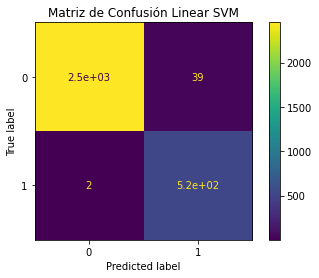

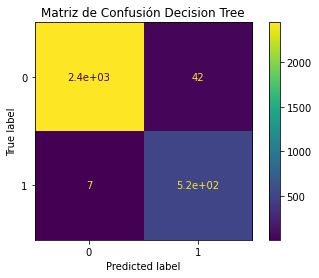

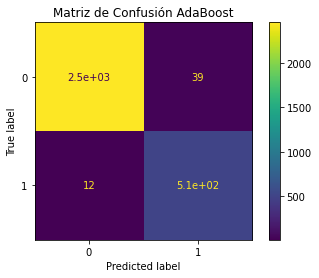

In [21]:
i=1
for name, est in zip(names, est_list):
  y_pred = est.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  cd=ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()
  plt.title("Matriz de Confusión "+name)
  i=i+1


## Algoritmos no Supervisados

Preprocesamiento <br>
Se realiza el mismo preprocesamiento hecho anteriormente pero para el conjunto de datos sin label

In [28]:
asteroids3=asteroids[asteroids.pha.isnull()].sample(n=10000)
X_data2 = asteroids3.drop(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'orbit_id', 'equinox', 'class',],axis=1)
X_data2 = X_data2.fillna(0)
scaler = preprocessing.StandardScaler()
scaler.fit(X_data2)
scaler.transform(X_data2)
X_data2=PCA(n_components=15).fit_transform(X_data2)


Algoritmo KMeans <br>
Se hace el entrenamiento del algoritmo con los datos respectivos y se evalúan con los datos de test usados previamente

In [34]:
est=KMeans(n_clusters=2) 
start = time.time()
est.fit(X_data2)
end=time.time()
timet=end-start
print("KMeans")
print("Tiempo de Ejecución: "+str(timet)+" segundos")
#score=est.score(X_test,y_test)
y_predict=est.predict(X_test)
print("Precisión: "+str(np.mean (y_predict == y_test)))

KMeans
Tiempo de Ejecución: 0.07631325721740723 segundos
Precisión: 0.9840901557838913
